<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 3</b>

    
Great! Thank you for your diligence on this and other sprints! I am very glad to see your progress 😊 I hope you enjoyed working on all these projects and learning data science. The project is accepted! 
    
    
    
Good luck! 

    
</div>



<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>

You almost finished it, great job! There are two issues that need your attention, but the updates should not take much time. Please note that you drop `customerid` column when creating features. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same. So you need to first drop all columns and then drop duplicates. Furthermore,  please note that `drop_duplicates()` does not drop anything. It only returns a new dataframe. So, in order to drop duplicates, you need to re-define `df`. 


 
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Gavin, my name is Svetlana (my handle on Discord is `svetatripleten`).  Congratulations on submitting the Final project! 🎉 
    

I am very sorry for this egregious delay 🙏 I hope, it didn't cause too much inconvenience. Fortunately, we don't have any technical issues anymore, so let's get started. 

    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

- You did a great job on building a good model for churn prediction.


- The notebook demonstrates strong fundamentals: clean data merging, thoughtful preprocessing, train-test splitting, and meaningful evaluation using AUC-ROC and accuracy.

    
- Hyperparameters tuning was implemented correctly, good! 
    

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

What can be improved:


- Consider writing an introduction to enhance the readability of your project :) 


- Consider introducing a broader EDA. Distributions and feature correlations may provide helpful context before modeling. 
 

- It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories. If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]), so well done! However, there are more preferable tools.

<details><summary><font color="purple">click here to read more</font></summary>
<br>
    
`OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

</details>


- Ideally, we should split data into 3 subsets, not 2. We first need to train all models, then we compare their metric on validation subset, choose the best model based on their validation metric, and only then we use the test subset, conducting the final test on the test subset using the best model. 


- Before training real models, it's useful to evaluate a constant (dummy) classifier. For example, by predicting the majority class. This sets a minimum performance baseline and ensures our data pipeline, target encoding, and evaluation metrics are functioning correctly. If our real model performs worse than this dummy, it signals a serious issue in preprocessing, feature engineering, or model configuration.


  
- You can also add the ROC curve for better representation. 



</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. More specifically: 


- Would you please drop duplicates after you drop columns?


- To prevent data leakage, we have to scale data after we split it.

    

</div> 

<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you demonstrated strong analytical and coding skills by preparing the data and training the models. There're several issues that need your attention, but the updates should not take much time. Feel free to ask questions if you have any 😉

</div>

## Project Overview
This project will find the best model to use to determine if a user will decide to stop using the service. To start we will examine the four datasets and combine them into one usable dataset. Then we will explore the data and prep the data to be used in our models. The models we will run are the RandomForest, Logistic Regression, KNN model, and LightGBM model. The model datasets will be split into three sets, a training, validation and test set. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score
import lightgbm as lgb
from sklearn.dummy import DummyClassifier



In [2]:
# import data

df1 = pd.read_csv('/datasets/final_provider/contract.csv')
df2 = pd.read_csv('/datasets/final_provider/personal.csv')
df3 = pd.read_csv('/datasets/final_provider/internet.csv')
df4 = pd.read_csv('/datasets/final_provider/phone.csv')
print("Contract")
display(df1.head)
print("Personal")
display(df2.head)
print("Internet")
display(df3.head)
print("Phone")
display(df4.head)

Contract


<bound method NDFrame.head of       customerID   BeginDate              EndDate            Type  \
0     7590-VHVEG  2020-01-01                   No  Month-to-month   
1     5575-GNVDE  2017-04-01                   No        One year   
2     3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3     7795-CFOCW  2016-05-01                   No        One year   
4     9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
...          ...         ...                  ...             ...   
7038  6840-RESVB  2018-02-01                   No        One year   
7039  2234-XADUH  2014-02-01                   No        One year   
7040  4801-JZAZL  2019-03-01                   No  Month-to-month   
7041  8361-LTMKD  2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK  2014-08-01                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0                 Yes           Electronic check           29

Personal


<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents
0     7590-VHVEG  Female              0     Yes         No
1     5575-GNVDE    Male              0      No         No
2     3668-QPYBK    Male              0      No         No
3     7795-CFOCW    Male              0      No         No
4     9237-HQITU  Female              0      No         No
...          ...     ...            ...     ...        ...
7038  6840-RESVB    Male              0     Yes        Yes
7039  2234-XADUH  Female              0     Yes        Yes
7040  4801-JZAZL  Female              0     Yes        Yes
7041  8361-LTMKD    Male              1     Yes         No
7042  3186-AJIEK    Male              0      No         No

[7043 rows x 5 columns]>

Internet


<bound method NDFrame.head of       customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     7590-VHVEG             DSL             No          Yes               No   
1     5575-GNVDE             DSL            Yes           No              Yes   
2     3668-QPYBK             DSL            Yes          Yes               No   
3     7795-CFOCW             DSL            Yes           No              Yes   
4     9237-HQITU     Fiber optic             No           No               No   
...          ...             ...            ...          ...              ...   
5512  6840-RESVB             DSL            Yes           No              Yes   
5513  2234-XADUH     Fiber optic             No          Yes              Yes   
5514  4801-JZAZL             DSL            Yes           No               No   
5515  8361-LTMKD     Fiber optic             No           No               No   
5516  3186-AJIEK     Fiber optic            Yes           No              Yes  

Phone


<bound method NDFrame.head of       customerID MultipleLines
0     5575-GNVDE            No
1     3668-QPYBK            No
2     9237-HQITU            No
3     9305-CDSKC           Yes
4     1452-KIOVK           Yes
...          ...           ...
6356  2569-WGERO            No
6357  6840-RESVB           Yes
6358  2234-XADUH           Yes
6359  8361-LTMKD           Yes
6360  3186-AJIEK            No

[6361 rows x 2 columns]>

Looks like there are 7043 customers, 5517 of them have internet service and 6361 have phone service

In [3]:
# missing values
print("customers")
print(df1.isnull().sum())
print("payment")
print(df2.isnull().sum())
print("internet")
print(df3.isnull().sum())
print("phone")
print(df4.isnull().sum())

customers
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
payment
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
internet
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
phone
customerID       0
MultipleLines    0
dtype: int64


In [4]:
# descriptive stats
print("customers")
print(df1.describe())
print("payment")
print(df2.describe())
print("internet")
print(df3.describe())
print("phone")
print(df4.describe())

customers
       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000
payment
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
internet
        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     4471-KXAUH     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No          

There seems to be a good number of columns that are some version of yes or no for the answers.

In [5]:
# dtypes
print("customers")
print(df1.dtypes)
print("payment")
print(df2.dtypes)
print("internet")
print(df3.dtypes)
print("phone")
print(df4.dtypes)


customers
customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object
payment
customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object
internet
customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object
phone
customerID       object
MultipleLines    object
dtype: object


There are a lot of columns wih the dtype = Object, we will need to change these to the correct type before running the models.

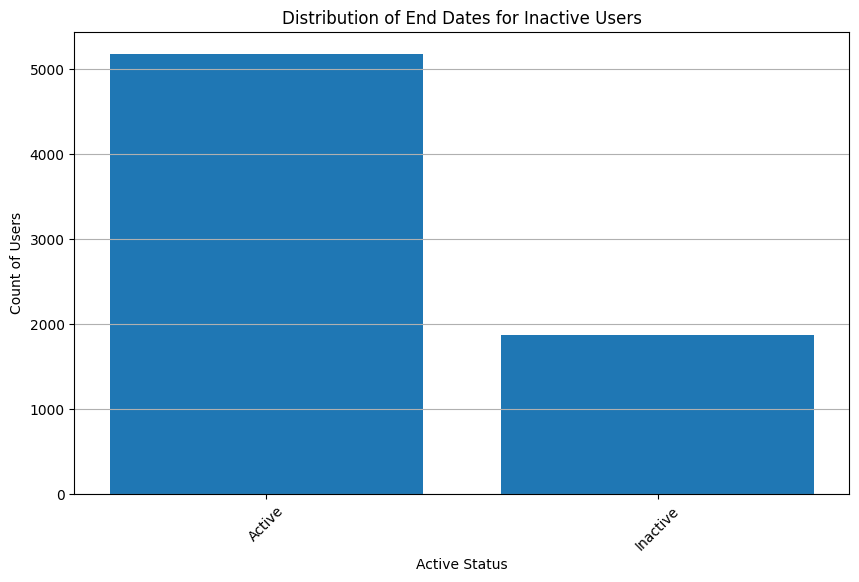

In [6]:
# Distribution of Churned users
active = (df1['EndDate'] == 'No').sum()
inactive = (df1['EndDate'] != 'No').sum()
# distribution of end date
plt.figure(figsize=(10, 6))
plt.bar(['Active', 'Inactive'], [active, inactive])
plt.title('Distribution of End Dates for Inactive Users')
plt.xlabel('Active Status')
plt.ylabel('Count of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

There are just under 2000 users who have stopped using the services and just over 5000 users who have not stopped using the services.


In [7]:
df1['TotalCharges'].value_counts()
print('Break')
df1['TotalCharges'].isnull().sum()

Break


0

In [8]:
df1['TotalCharges'].dtype
df1['TotalCharges'].head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [9]:
df1[pd.to_numeric(df1['TotalCharges'], errors='coerce').isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [10]:
df1.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [11]:
df1 = df1.drop(['TotalCharges', 'BeginDate'], axis=1)

In [12]:
df1.columns



Index(['customerID', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [13]:
df = df1.merge(df2, on='customerID', how='left') \
                  .merge(df3, on='customerID', how='left') \
                  .merge(df4, on='customerID', how='left')

In [14]:
# lowercase
df.columns = df.columns.str.lower()
print(df.columns)

Index(['customerid', 'enddate', 'type', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines'],
      dtype='object')


In [15]:
##### shape check
print(df.shape)
########### dropping customer_id
df = df.drop(['customerid'], axis=1)

(7043, 18)


In [16]:

### dropping duplicates
df = df.drop_duplicates()

print(df)

                  enddate            type paperlessbilling  \
0                      No  Month-to-month              Yes   
1                      No        One year               No   
2     2019-12-01 00:00:00  Month-to-month              Yes   
3                      No        One year               No   
4     2019-11-01 00:00:00  Month-to-month              Yes   
...                   ...             ...              ...   
7038                   No        One year              Yes   
7039                   No        One year              Yes   
7040                   No  Month-to-month              Yes   
7041  2019-11-01 00:00:00  Month-to-month              Yes   
7042                   No        Two year              Yes   

                  paymentmethod  monthlycharges  gender  seniorcitizen  \
0              Electronic check           29.85  Female              0   
1                  Mailed check           56.95    Male              0   
2                  Mailed check  

In [17]:
##### shape check after dropping
df.shape


(6826, 17)

In [18]:
print(df.dtypes)
print("")
print(df.isnull().sum())

enddate              object
type                 object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
gender               object
seniorcitizen         int64
partner              object
dependents           object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
multiplelines        object
dtype: object

enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1326
onlinesecurity      1326
onlinebackup        1326
deviceprotection    1326
techsupport         1326
streamingtv         1326
streamingmovies     1326
multiplelines        680
dtype: int64


In [19]:
# convert dtypes

df['enddate'] = pd.to_datetime(df['enddate'], errors='coerce')
df['paperlessbilling'] = df['paperlessbilling'].astype('category')
df['paymentmethod'] = df['paymentmethod'].astype('category')
df['gender'] = df['gender'].astype('category')
df['partner'] = df['partner'].astype('category')
df['dependents'] = df['dependents'].astype('category')
df['internetservice'] = df['internetservice'].astype('category')
df['onlinesecurity'] = df['onlinesecurity'].astype('category')
df['onlinebackup'] = df['onlinebackup'].astype('category')
df['deviceprotection'] = df['deviceprotection'].astype('category')
df['techsupport'] = df['techsupport'].astype('category')
df['streamingtv'] = df['streamingtv'].astype('category')
df['streamingmovies'] = df['streamingmovies'].astype('category')
df['multiplelines'] = df['multiplelines'].astype('category')

In [20]:
df.dtypes

df['enddate'] = df['enddate'].astype(str)
# drop enddate
df = df.dropna(subset=['enddate'])  


In [21]:
print(df['enddate'].unique())

['NaT' '2019-12-01' '2019-11-01' '2019-10-01' '2020-01-01']


In [22]:
# seperate churned from not churned
churned_clients = df[df['enddate'] != 'NaT']
non_churned_clients = df[df['enddate'] == 'NaT']
# combine churned and not churned
df = pd.concat([churned_clients, non_churned_clients.sample(n=len(churned_clients), random_state=42)])


In [23]:
##### feature correlation
dfcor = df.corr()
print(dfcor)

                monthlycharges  seniorcitizen
monthlycharges        1.000000       0.197218
seniorcitizen         0.197218       1.000000


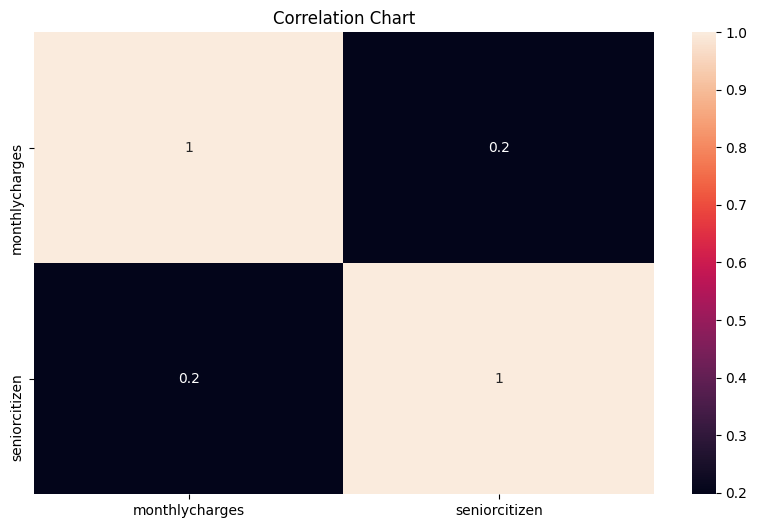

In [24]:
##### correlation chart
plt.figure(figsize=(10, 6))
sns.heatmap(dfcor, annot=True)
plt.title("Correlation Chart")
plt.show()

In [25]:
# features and target


target = (df['enddate'] != 'NaT').astype(int) 
features = df.drop(['enddate'], axis=1)



In [26]:
# convert categorical variables
features = pd.get_dummies(features, drop_first=True)

In [27]:
# features and target shape
print('Features:', features.shape)
print('Target:', target.shape)

Features: (3726, 19)
Target: (3726,)


In [28]:
print(target.value_counts())

0    1863
1    1863
Name: enddate, dtype: int64


In [29]:
###### Changed, added 3rd split

#Split into train and test sets
#80% train 20% test
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

### split the training set into training and validation sets
# 80%*(1-.25) == 60% train 80%*.25 == 20% valid
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)




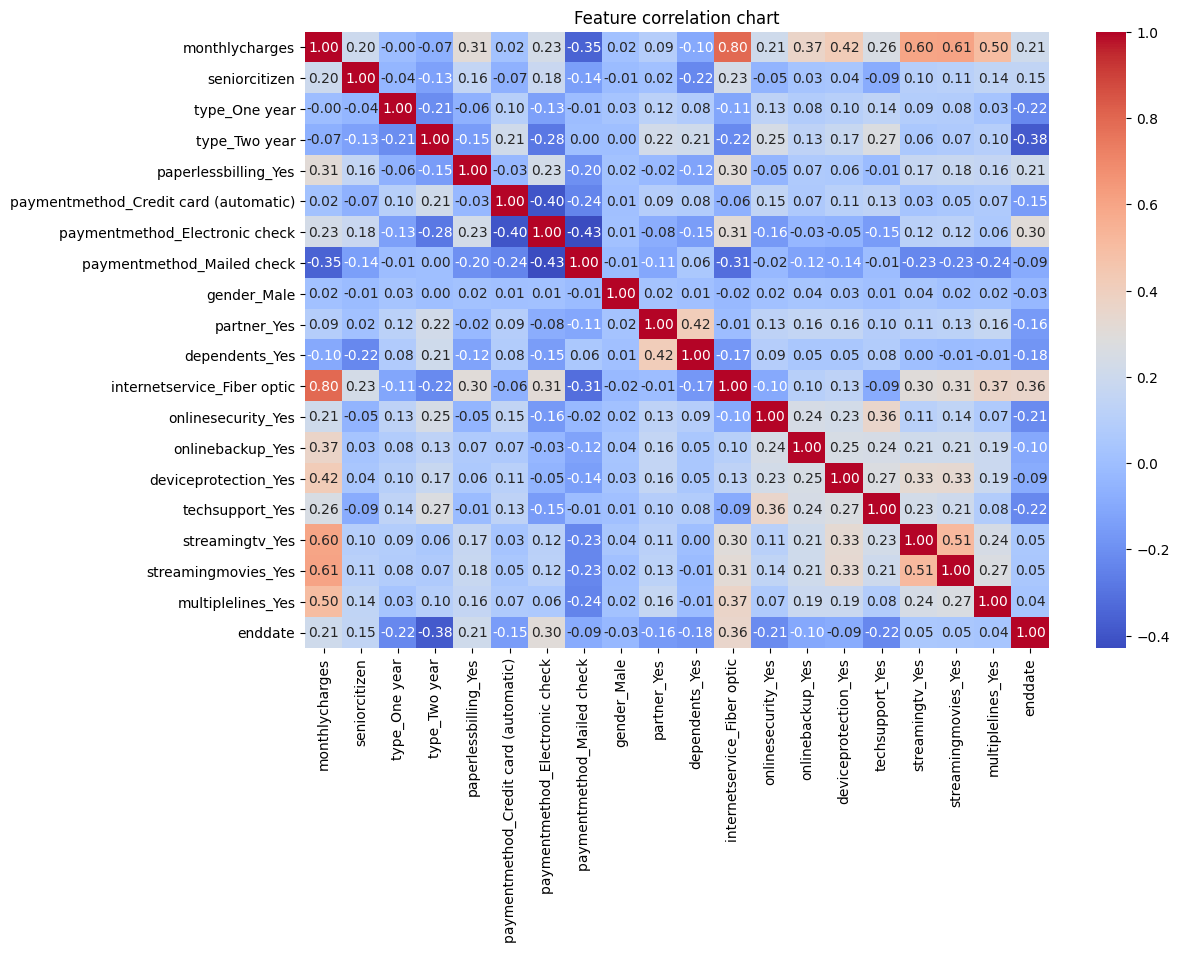

In [30]:
##### feature correlation chart
df_con = pd.concat([features_train, target_train], axis=1)
plt.figure(figsize=(12, 8))
corr_train = df_con.corr()
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature correlation chart")
plt.show()

Going off of our target of EndDate, the type of contract has a negative correlation with the two year being the largest negative at -.38, the strongest correlations are internet servie and paying by electronic check.

In [31]:
#### moved and added valid set
# scale features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_valid_scaled = scaler.transform(features_valid)
features_test_scaled = scaler.transform(features_test)



In [32]:
####### Dummy baseline

baseline = DummyClassifier(random_state=12345)
baseline.fit(features_train_scaled, target_train)
pred_base = baseline.predict_proba(features_valid_scaled)[:,1]
base_ac = roc_auc_score(target_valid, pred_base)
print("Baseline AucRoc:", base_ac)


Baseline AucRoc: 0.5


In [33]:
# Initialize models
# random forest
model_rf = RandomForestClassifier(random_state=12345)
rf_distributions = {
    'n_estimators': [25, 50, 75, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 5, 8]
}
rf_random = RandomizedSearchCV(
    model_rf,
    rf_distributions,
    n_iter=10,  
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=12345
)
rf_random.fit(features_train_scaled, target_train)
print("rf done")

rf done


In [34]:
# find best model and score
best_model_rf = rf_random.best_estimator_
pred_rf = best_model_rf.predict_proba(features_train_scaled)[:,1]
auc_roc_rf_train = roc_auc_score(target_train, pred_rf)
print(auc_roc_rf_train)



0.8738607654758872


In [35]:
# rf valid
rf_valid_preds = best_model_rf.predict_proba(features_valid_scaled)[:,1]
rf_valid_ac = roc_auc_score(target_valid, rf_valid_preds)
print(rf_valid_ac)

0.8397097625329816


In [36]:
# logistic regression
model_lr = LogisticRegression(max_iter=1500)
model_lr.fit(features_train_scaled, target_train)



pred_lr = model_lr.predict_proba(features_train_scaled)[:,1]
lr_train_ac = roc_auc_score(target_train, pred_lr)
print(lr_train_ac)




0.8256841014205087


In [37]:


# lr valid

pred_lr_valid = model_lr.predict_proba(features_valid_scaled)[:,1]
lr_valid_ac = roc_auc_score(target_valid, pred_lr_valid)
print(lr_valid_ac)







0.8287555690125005


In [38]:
# knn
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(features_train_scaled, target_train)



# predictions
train_probs = knn_model.predict_proba(features_train_scaled)[:,1]
knn_ac = roc_auc_score(target_train, train_probs)
print(knn_ac)



0.8401170754213705


In [39]:
# valid knn

valid_knn_probs = knn_model.predict_proba(features_valid_scaled)[:,1]
knn_ac_valid = roc_auc_score(target_valid, valid_knn_probs)

print(knn_ac_valid)


0.8125711896419971


In [40]:
# lightgbm 
train_data = lgb.Dataset(features_train_scaled, label=target_train)
# hyperparameters
lgb_params_1 = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'random_state':12345
}
# train lgb model
lgb_model = lgb.train(
    lgb_params_1,
    train_data,
    num_boost_round = 100,
    valid_sets = [train_data],
   
)

pred_lgb = lgb_model.predict(features_train_scaled)
auc_roc_lgb = roc_auc_score(target_train, pred_lgb)


[LightGBM] [Info] Number of positive: 1098, number of negative: 1137
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 2235, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491275 -> initscore=-0.034903
[LightGBM] [Info] Start training from score -0.034903
[1]	training's auc: 0.837155
[2]	training's auc: 0.850578
[3]	training's auc: 0.853792
[4]	training's auc: 0.855744
[5]	training's auc: 0.855431
[6]	training's auc: 0.857069
[7]	training's auc: 0.859522
[8]	training's auc: 0.860142
[9]	training's auc: 0.860113
[10]	training's auc: 0.860484
[11]	training's auc: 0.861669
[12]	training's auc: 0.8615
[13]	training's auc: 0.862939
[14]	training's auc: 0.864088
[15]	training's auc: 0.864511
[16]

In [41]:

# LGB hyperparameters

lgb_param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'bagging_freq': [1, 5, 10]    
}
# RandomizedSearchCV for best params
lgb_random = RandomizedSearchCV(
    lgb.LGBMClassifier(objective='binary', metric='auc', random_state=12345),
    lgb_param_grid,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=12345
)
# fit new model
lgb_random.fit(features_train_scaled, target_train)


# find best model

best_lgb_model = lgb_random.best_estimator_
pred_lgb_best = best_lgb_model.predict_proba(features_valid_scaled)[:, 1]
lgb_best_ac = roc_auc_score(target_valid, pred_lgb_best)



[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0

In [42]:
print('Best hyper LightGBM AUC-ROC:', lgb_best_ac)

Best hyper LightGBM AUC-ROC: 0.8375542483094712


In [43]:
# find best model
pred_lgb_valid = best_lgb_model.predict_proba(features_valid_scaled)[:, 1]
lgb_valid_ac = roc_auc_score(target_valid, pred_lgb_valid)
print('Valid LightGBM AUC-ROC:', lgb_valid_ac)


Valid LightGBM AUC-ROC: 0.8375542483094712


In [44]:

# results
results = {
    'Model': ['Random Forest', 'Logistic Regression', 'KNN', 'LightGBM'],
    'AUC-ROC Score': [rf_valid_ac, lr_valid_ac, knn_ac_valid, lgb_valid_ac]
}
results_df = pd.DataFrame(results)
print("Models AucRoc scores:", results_df)


Models AucRoc scores:                  Model  AUC-ROC Score
0        Random Forest       0.839710
1  Logistic Regression       0.828756
2                  KNN       0.812571
3             LightGBM       0.837554


Based on our results dataframe, the best model on the validation set is the Random Forest model beating out the LightGbm model by 0.0022 on the AucRoc score. This will be the model used for the final test.

# Final model testing

In [45]:
# Final test model
pred_rf_test = best_model_rf.predict_proba(features_test_scaled)[:,1]
rf_test_ac = roc_auc_score(target_test, pred_rf_test)
print(rf_test_ac)

0.7903173575129534


# Conclusion
Final model is the Random Forest model and it produced an AucRoc score of 0.79. This model should be able to predict which users will churn accurately giving our client a good chance at sending out discount codes to users flagged as potential Churns. I was surprised to see that the contract length would have such a low correlation to the enddate as I assumed that people would potentially leave at the end of the contract or renew with it not being dependent on the length. The Random Forest model surprised me as being the best model when it is a rather simple model in terms of the number of tweaks and hyperparamters added to improve performance like shown in the Light GBM model. The Random Forest model finished with a training aucroc score of 0.87386 and a validation score of 0.83971 with the final test AucRoc score of 0.79.